In [181]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


# ETAPE 1 : IMPORTATION DES DONNEES 

In [217]:
df_VIX = pd.read_fwf('data/VIX.txt',names=['Années','Clôture'])



In [218]:
df_VIX


,Années,Clôture
0,06/01/1995,"13,13"
1,13/01/1995,"11,1"
2,20/01/1995,"12,15"
3,27/01/1995,"11,25"
4,03/02/1995,"10,98"
...,...,...
1287,06/09/2019,15
1288,13/09/2019,"13,74"
1289,20/09/2019,"15,32"
1290,27/09/2019,"17,22"


In [219]:
df_SPX = pd.read_fwf('data/SPX.txt',names=['Années','Clôture'])




In [220]:
df_SPX.head()


,Années,Clôture
0,06/01/1995,"460,68"
1,13/01/1995,"465,97"
2,20/01/1995,"464,78"
3,27/01/1995,"470,39"
4,03/02/1995,"478,64"


In [221]:
df_SPX.head()

,Années,Clôture
0,06/01/1995,"460,68"
1,13/01/1995,"465,97"
2,20/01/1995,"464,78"
3,27/01/1995,"470,39"
4,03/02/1995,"478,64"


# ETAPE 2 : ANALYSE EXPLORATOIRE DES DONNEES 

    - L'objectif est de faire parler nos données, afin d'en prendre connaissance
      et savoir quel modèle appliqué par la suite 
      
    - Faire parler les données permet de savoir par exemple : 
       - Quels sont les types de variables 
       - A quoi fait référence ces données ? etc ...

In [222]:
df_SPX.head()

,Années,Clôture
0,06/01/1995,"460,68"
1,13/01/1995,"465,97"
2,20/01/1995,"464,78"
3,27/01/1995,"470,39"
4,03/02/1995,"478,64"


### Modification des données SPX

In [223]:
df_SPX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Années   1292 non-null   object
 1   Clôture  1292 non-null   object
dtypes: object(2)
memory usage: 20.3+ KB


#### Conclusion : après intérogation de nos données "SPX" , il en ressort que 
                    - nous avons des deux colonnes : années et clôture 
                    - nous anons 1292 linges 
                    - aucune donnée nulles 
                    - les variables osnt de types objets , on procède ainsi à la conversion de str en int

In [224]:
df_SPX['Années'] = pd.to_datetime(df_SPX['Années'])

In [225]:
df_SPX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Années   1292 non-null   datetime64[ns]
 1   Clôture  1292 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.3+ KB


In [226]:
df_SPX['Clôture'] = df_SPX['Clôture'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [227]:
df_SPX['Clôture'] = pd.to_numeric(df_SPX['Clôture'])

In [228]:
df_SPX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Années   1292 non-null   datetime64[ns]
 1   Clôture  1292 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.3 KB


In [229]:
df_SPX=df_SPX.set_index('Années')

<AxesSubplot:xlabel='Années'>

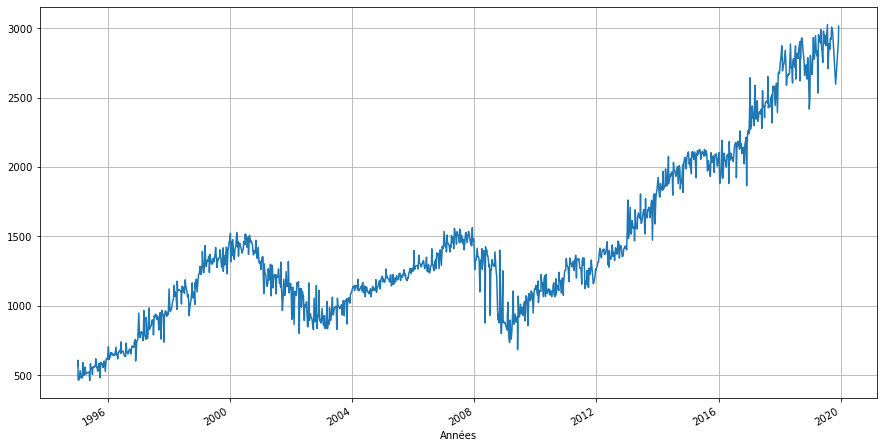

In [230]:
df_SPX['Clôture'].plot(grid=True, figsize=(15,8))


#### Nous remarquons une tendance 
    haussiaire entre : 
        - 1996-2000
        - 2004-2008
        - 2010-2020
        
    Baissière entre : 
        - 2001-2003
        - 2008-2009


### Modification des données de VIX 

In [145]:
df_VIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Années   1292 non-null   object
 1   Clôture  1292 non-null   object
dtypes: object(2)
memory usage: 20.3+ KB


In [146]:
df_VIX['Années'] = pd.to_datetime(df_VIX['Années'])

In [147]:
df_VIX['Clôture'] = df_VIX['Clôture'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [148]:
df_VIX['Clôture'] = pd.to_numeric(df_VIX['Clôture'])

In [149]:
df_VIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Années   1292 non-null   datetime64[ns]
 1   Clôture  1292 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.3 KB


In [150]:
df_VIX=df_VIX.set_index('Années')

<AxesSubplot:xlabel='Années'>

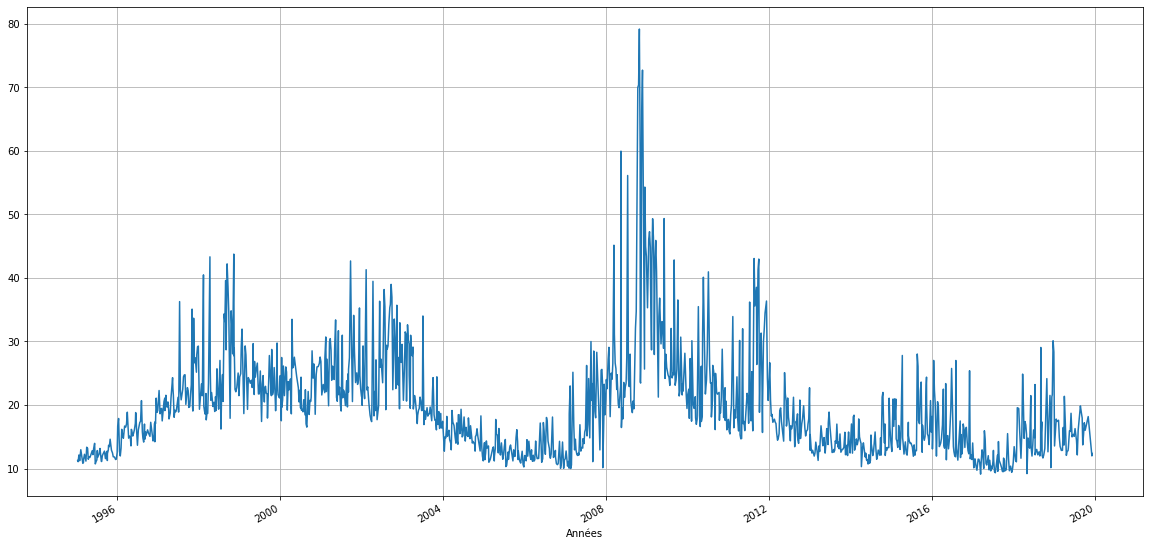

In [151]:
df_VIX['Clôture'].plot(grid=True, figsize=(20,10))


#### Conclusion : nous constatons que la courbe est instable et contient des tendances 

### Analyse en profondeur du SPX  et VIX 
         - Le VIX étant l'indicice de la peur, analysons son influence sur l'évolution du SPX

<AxesSubplot:xlabel='Années'>

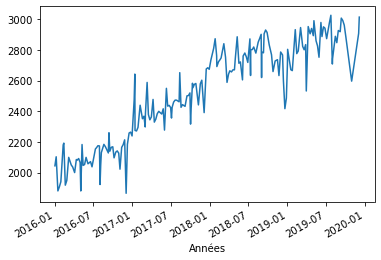

In [158]:
df_SPX.loc['2016':'2019','Clôture'].plot()


<AxesSubplot:xlabel='Années'>

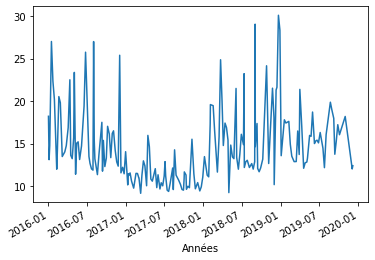

In [162]:
df_VIX.loc['2016':'2019','Clôture'].plot()

<AxesSubplot:xlabel='Années'>

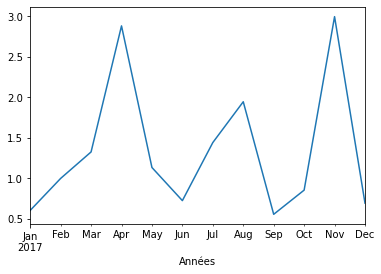

In [170]:
df_VIX.loc['2017', 'Clôture'].resample('M').std().plot()

<AxesSubplot:xlabel='Années'>

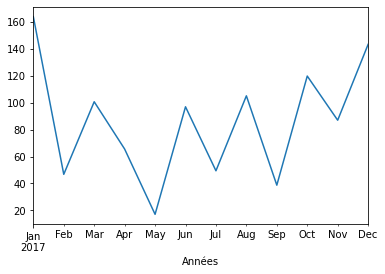

In [177]:
df_SPX.loc['2017', 'Clôture'].resample('M').std().plot()



### Conclusion : 
        - On constate que le SPX évolu dans le sens contraire du VIX . 
        -  Lorsqu'on a un pic positif du VIX comme c'est le cas en mai 2016 , on observe un 
           pic négatif du SPX à la même période 

### Calcule de la moyenne sur 2 tendances différentes : 
        - tendance haussaire : 2009-2020
        - tendance baissière : 2007-2009

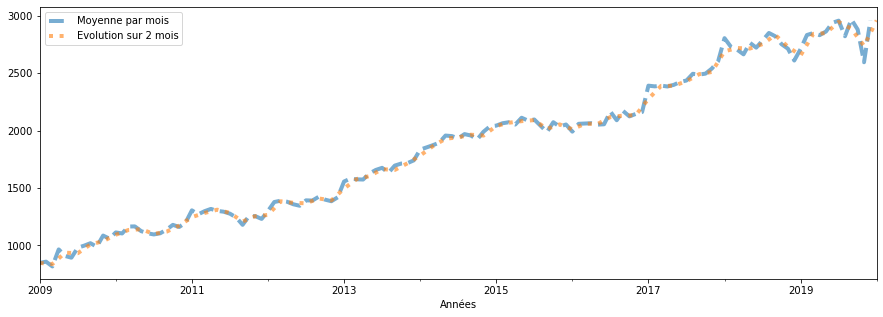

In [187]:
plt.figure(figsize=(15, 5))
df_SPX.loc['2009':'2020', 'Clôture'].resample('M').mean().plot(label='Moyenne par mois', lw=4, ls='--', alpha=0.6)
df_SPX.loc['2009':'2020', 'Clôture'].resample('2M').mean().plot(label='Evolution sur 2 mois', lw=4, ls=':', alpha=0.6)

plt.legend()
plt.show()


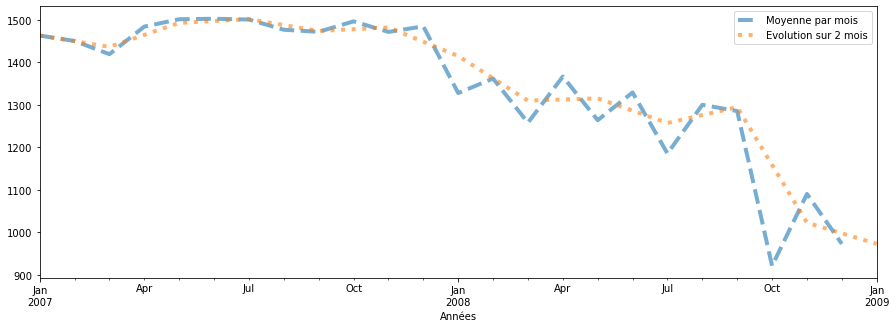

In [190]:
plt.figure(figsize=(15, 5))
df_SPX.loc['2007':'2008', 'Clôture'].resample('M').mean().plot(label='Moyenne par mois', lw=4, ls='--', alpha=0.6)
df_SPX.loc['2007':'2008', 'Clôture'].resample('2M').mean().plot(label='Evolution sur 2 mois', lw=4, ls=':', alpha=0.6)

plt.legend()
plt.show()

### Calcule de l'écart-type sur 2 tendances différentes : 
        - tendance haussaire : 2009-2020
        - tendance baissière : 2007-2009

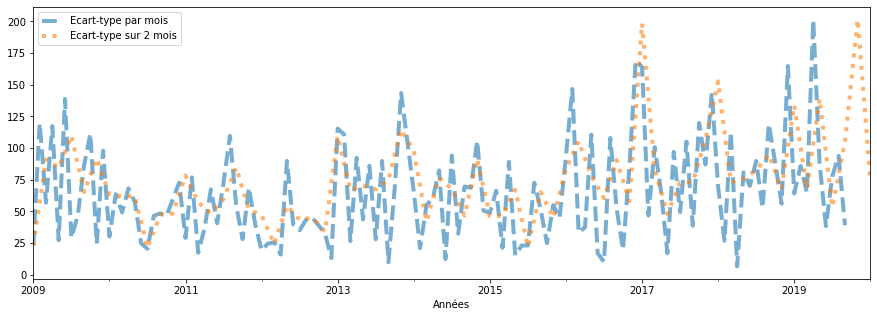

In [196]:
plt.figure(figsize=(15, 5))
df_SPX.loc['2009':'2019', 'Clôture'].resample('M').std().plot(label='Ecart-type par mois', lw=4, ls='--', alpha=0.6)
df_SPX.loc['2009':'2019', 'Clôture'].resample('2M').std().plot(label='Evolution sur 2 mois', lw=4, ls=':', alpha=0.6)

plt.legend()
plt.show()

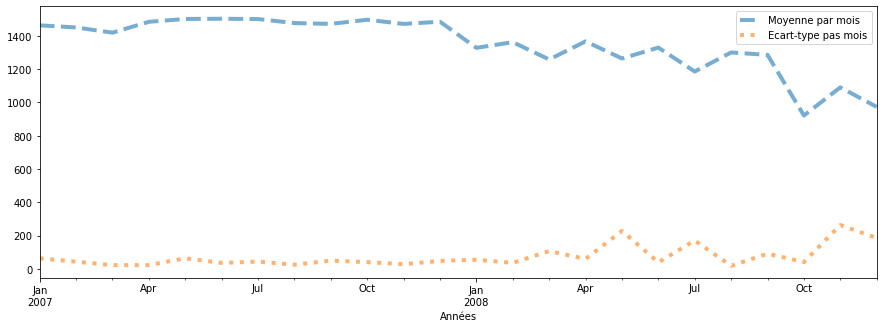

In [199]:
plt.figure(figsize=(15, 5))
df_SPX.loc['2007':'2008', 'Clôture'].resample('M').mean().plot(label='Moyenne par mois', lw=4, ls='--', alpha=0.6)
df_SPX.loc['2007':'2008', 'Clôture'].resample('M').std().plot(label='Ecart-type pas mois', lw=4, ls=':', alpha=0.6)

plt.legend()
plt.show()

### Quand on observe ce graphique on constate : 
     - un très grand écart entre la moyenne et l'écart-type 
     - cet ecart tend à se resserer vers fin octobre 2008 

Conclusion : 

     - En 2007 on assiste à la crise des subprime 
     - le risque d'investissment éatnt élevé ,
     cela explique le grand écart entre la moyenne et l'écart-type  

In [207]:
df_SPX

,Clôture
Années,
1995-06-01,460.68
1995-01-13,465.97
1995-01-20,464.78
1995-01-27,470.39
1995-03-02,478.64
...,...
2019-06-09,2978.70
2019-09-13,3007.30
2019-09-20,2992.00


# ETAPE 3 : PREPARATION DES DONNES / PREPROCESSING

     - Nous allons pré-traiter nos données afin d'en extraire le potentielen supprimant :
     
         - des données mal annotées
         - données non disponibles
         - des doublons
         - des informations incohérentes et ou superflues...
         
     - Ainsi nous passerons des données brutes à des données analysable par notre algorithme 
         
    

###     I°) CREATION D'UNE FONCTION POUR LE NETOYAGE DES DONNES 

In [231]:
def df_cleaner(data_new):
    
    data_new=data_new.copy()
    #data_new['Clôture'] = data_new['Clôture'].apply(lambda x: float(x.split()[0].replace(',','.')))
    #data_new = data.set_index('Années')
    
    return data_new


In [234]:
df_SPX = df_cleaner(df_SPX)

In [235]:
df_VIX = df_cleaner(df_VIX)

# ETAPE 4 : MODELISATION 

     Etant données que nous traitons des données de serie temporelles , 
     nous sommes amenés à utliser en premier modèle
         - LSTM 
         - ARIMA 
         